In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2
import os

In [2]:

# Dataset path
BASE_DIR = r"C:\Users\vivek\OneDrive\Desktop\DL Lab\assignment_1\Hindi-MNIST"
TRAIN_DIR = os.path.join(BASE_DIR, "train")
TEST_DIR = os.path.join(BASE_DIR, "test")
CATEGORIES = [str(i) for i in range(10)]  # Hindi digits 0-9

def load_data(data_dir):
    data = []
    labels = []
    for category in CATEGORIES:
        path = os.path.join(data_dir, category)
        label = int(category)
        for img_file in os.listdir(path):
            img_path = os.path.join(path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (28, 28))  # Resize if needed
                data.append(img)
                labels.append(label)
    return np.array(data), np.array(labels)

In [3]:
# Load train and test data
X_train, y_train = load_data(TRAIN_DIR)
X_test, y_test = load_data(TEST_DIR)

# Normalize and one-hot encode
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
# Model definition
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Users\vivek\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train model
history = model.fit(X_train, y_train, epochs=12, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/12
532/532 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8258 - loss: 0.5871 - val_accuracy: 0.9603 - val_loss: 0.1384
Epoch 2/12
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9711 - loss: 0.0974 - val_accuracy: 0.9670 - val_loss: 0.1055
Epoch 3/12
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9839 - loss: 0.0612 - val_accuracy: 0.9787 - val_loss: 0.0857
Epoch 4/12
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9916 - loss: 0.0363 - val_accuracy: 0.9827 - val_loss: 0.0657
Epoch 5/12
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9918 - loss: 0.0250 - val_accuracy: 0.9810 - val_loss: 0.0745
Epoch 6/12
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9941 - loss: 0.0185 - val_accuracy: 0.9817 - val_loss: 0.0726
Epoch 7/12
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9952 - loss: 0.0145 - val_accuracy: 0.9670 - val_loss: 0.1121
Epoch 8/12
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9954 - loss: 0.0174 - val_accuracy: 0.

In [8]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9793 - loss: 0.0940
Test Accuracy: 0.9783


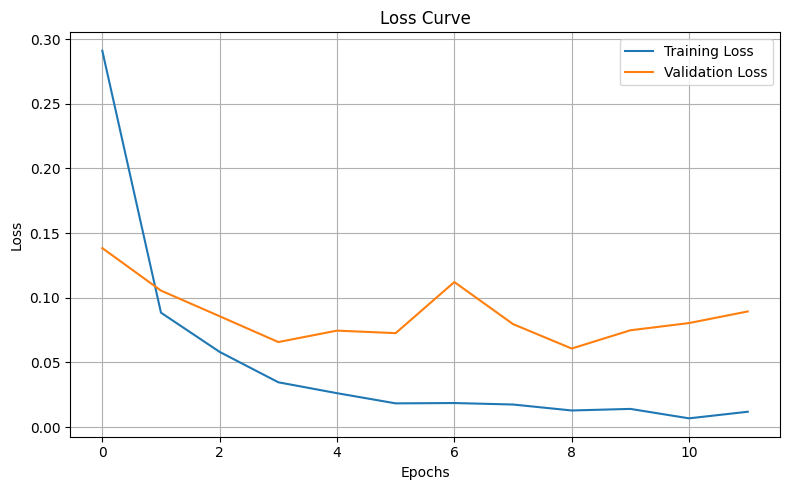

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


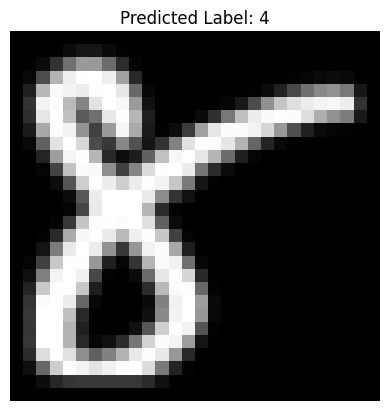

In [14]:
# Testing the model with a new image
image_path = r"C:\Users\vivek\OneDrive\Desktop\DL Lab\assignment_1\test_image.png"  # or .png, etc.

# Load the image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Resize to 28x28 (same as training)
img_resized = cv2.resize(img, (28, 28))

# Normalize pixel values
img_normalized = img_resized / 255.0

# Reshape to match model input shape: (1, 28, 28)
img_input = img_normalized.reshape(1, 28, 28)

# Predict using the model
prediction = model.predict(img_input)
predicted_label = np.argmax(prediction)

# Show image with predicted label
plt.imshow(img_resized, cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


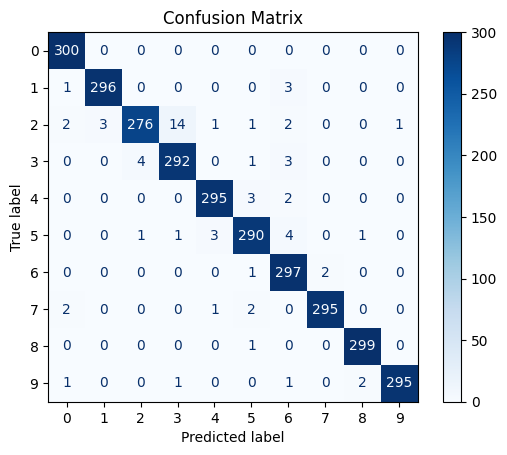

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict labels for test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()